# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

<IPython.core.display.Javascript object>


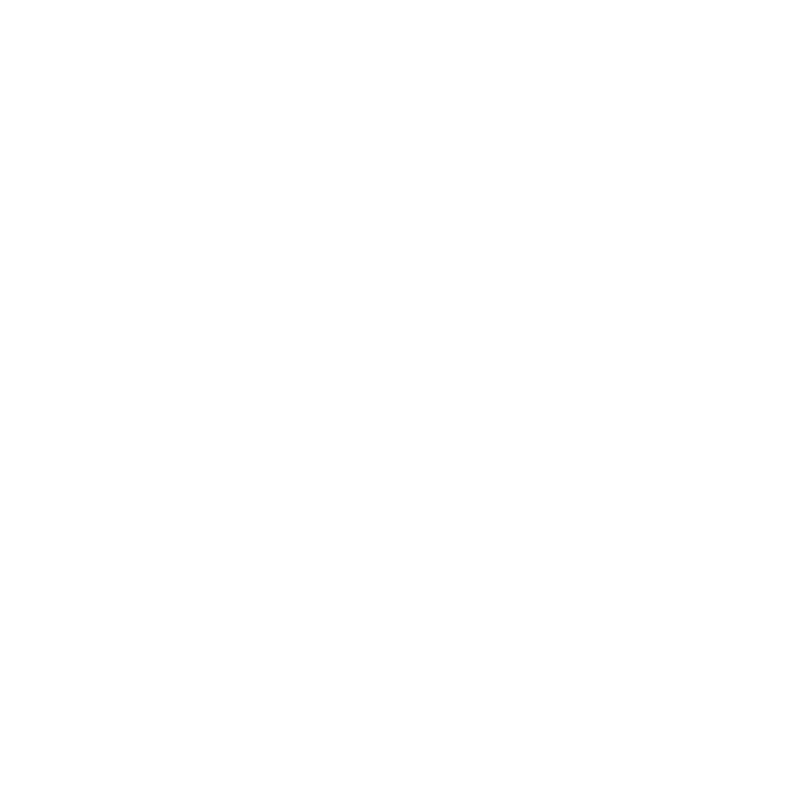

In [58]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

<IPython.core.display.Javascript object>


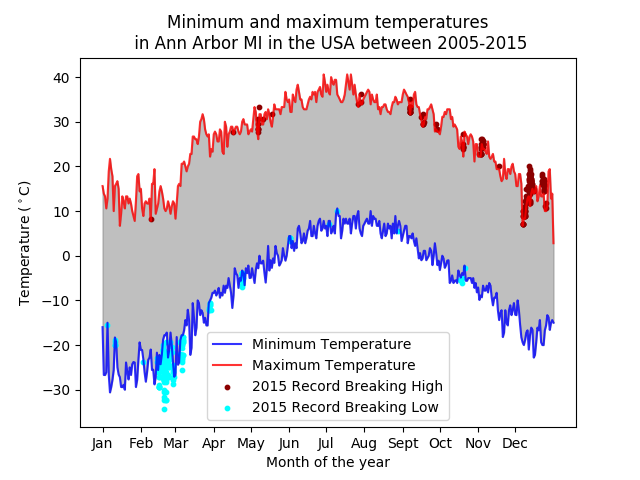

In [126]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# import dataframe
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

# tidy data frame. filter out leap days. only include 2005-2014, and then separately 2015.
df = df.sort_values(by = 'Date', ascending = True)
df['Date'] = pd.to_datetime(df['Date']) #convert 'Date' column to 'datetime' values instead of 'str' values.
df['Temperature'] = df['Data_Value'] / 10 # convert temperature to degrees celsius insteads of 1/10 degrees celsius.
df = df.set_index('Date')
df = df[~((df.index.month == 2) & (df.index.day == 29))]
df['dayofyear'] = df.index.dayofyear
df['month'] = df.index.month

df1 = df.loc['2005-01-01':'2014-12-31'] # define 2005-2014 dataframe
df2 = df.loc['2015-01-01': '2015-12-31'] # define the 2015 dataframe

# set up the lines for the line plot
tmin = df1[df1['Element'] == 'TMIN'].reset_index().groupby(['dayofyear']).min() # define tmin line. retain only min temps per day.
tmax = df1[df1['Element'] == 'TMAX'].reset_index().groupby(['dayofyear']).max() # define tmax line. retain only min temps per day.

# set up line plot.
plt.figure()
plt.plot(tmin['Temperature'], '-b', label = 'Minimum Temperature', alpha = 0.8) # plot record min for each 'dayofyear'.
plt.plot(tmax['Temperature'], '-r', label = 'Maximum Temperature', alpha = 0.8) # plot record max for each 'dayofyear'.
x = tmax.index.values
plt.fill_between(x, tmin['Temperature'], tmax['Temperature'], color = 'grey', alpha = '0.5') # fill space between

# tidy 'df2' to include only data points which are lower than 'tmin' or greater than 'tmax'
df2_max = df2[df2['Temperature'] > df2['dayofyear'].map(tmax['Temperature'])] # define record breaking highs in 2015
df2_min = df2[df2['Temperature'] < df2['dayofyear'].map(tmin['Temperature'])] # define record breaking lows in 2015

# superimpose scatter plot
plt.scatter(df2_max.dayofyear.tolist(), df2_max['Temperature'], s = 10, c = 'darkred',
           label = '2015 Record Breaking High') # plot 2015 record breaking highs.
plt.scatter(df2_min.dayofyear.tolist(), df2_min['Temperature'], s = 10, c = 'aqua',
           label = '2015 Record Breaking Low') # plot 2015 record breaking lows.

# redefine the x axis for easing decoding.
months = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335] # define when each month starts in 'dayofyear'
plt.xticks(months,
          ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])

# apply final labels
plt.title('Minimum and maximum temperatures\n in Ann Arbor MI in the USA between 2005-2015', fontsize = 12)
plt.xlabel('Month of the year')
plt.ylabel('Temperature ($^\circ$C)')
plt.legend()

<IPython.core.display.Javascript object>


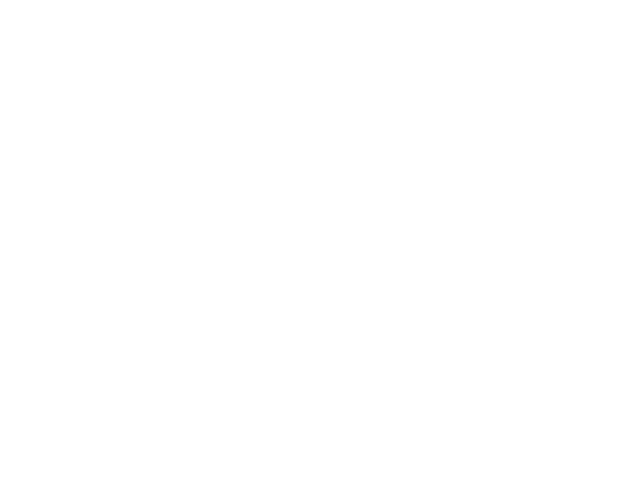